## Final Project Submission

Please fill out:
* Student name: Jordan Lunak
* Student pace: self paced
* Scheduled project review date/time: Feb 26th, 11:30am Central
* Instructor name: Eli Thomas
* Blog post URL: https://datalearningblog.science.blog/2019/02/24/data-cleaning/


## Overview
The following multiple regression problem is to identify the key factors in predicting a home price in King's County. The dataset contains features and prices of current homes and from that data, future home prices can be predicted given their features. The goal is to find the key features responsible for setting the home prices.

The approach for analysis will follow the OSEMN model. After obtaining the data, that data will be scrubbed by making sure features are coded in correct type and null values are removed. The data will be explored by looking at scatter plots and histograms. It will be important to check for outliers and normality of data. Some features will need to be transformed and scaled in order to get the data ready for modeling. Features will be selected, and a model will be built. Predictive nature of the model will be checked using train test split and cross validation. Based on the model summary, the data can be interpreted to determine the most important features when it comes to predicting the price of a home.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
#import data file and view contents
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Checking dataframe types
  - Make sure types are coded correctly
  - Check for placeholder values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Zipcode is coded as integer, but has no quantitative value. I would like to change that to a 'string'.
Waterfront is coded as a float, but is only using 1 or 0 which is categorical. I will also change that to a 'string'.
Squarefoot basement is coded as string, but should have quantitative value. It may contain a non-numerical placeholder value.

In [4]:
df.zipcode.nunique()

70

In [5]:
df.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [434]:
df['zipcode'] = df.zipcode.astype(str)

In [435]:
#Waterfront is categorical variable which should be converted to type string
df['waterfront'] = df['waterfront'].astype("str")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(3)
memory usage: 3.5+ MB


In [8]:
#sqft_basement is coded as object
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [9]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
3480.0        1
2300.0        1
2730.0        1
506.0         1
2400.0        1
1008.0        1
792.0         1
3000.0        1
20.0          1
143.0         1
2240.0        1
2850.0        1
602.0         1
1960.0        1
1798.0        1
2390.0        1
935.0         1
2190.0        1
516.0         1
2250.0        1
274.0         1
176.0         1
1245.0        1
1275.0        1
508.0         1
2600.0        1
4820.0        1
1816.0        1
784.0         1
2580.0        1
Name: sqft_basement, Len

In [10]:
#checking percentage of ? values in sqft_basement
454/21597

0.021021438162707785

In [436]:
#2% of data as ? values for basement, which is a small set of data. I will drop the rows with ? values to remove the null values.
len(df.loc[df['sqft_basement']=='?'])

454

In [437]:
df = df[df["sqft_basement"] != '?']

In [438]:
#Checking to make sure '?' is gone
len(df.loc[df['sqft_basement']=='?'])

0

In [310]:
df['sqft_basement'] = df.sqft_basement.astype(float)

In [15]:
#Check to make sure data is stored correctly now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
id               21143 non-null int64
date             21143 non-null object
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       18804 non-null float64
view             21082 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null object
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(9), int64(10), object(2)
memory usage: 3.5+ MB


### Find out more about Dependent Variable - Price

It is important to explore the dependent variable to check for normality, skew, outliers, etc. Since our main question revolves around the dependent variable, we need to make sure it is clean.

In [278]:
df.price.describe()

count    2.114300e+04
mean     5.405107e+05
std      3.680751e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [411]:
# Price values range from $78,000 to $7,700,000 with a mean of $540,510 and median of $450,000.
# 75th percentile is $645,000 which shows the max may be an outlier bringing the mean value up.

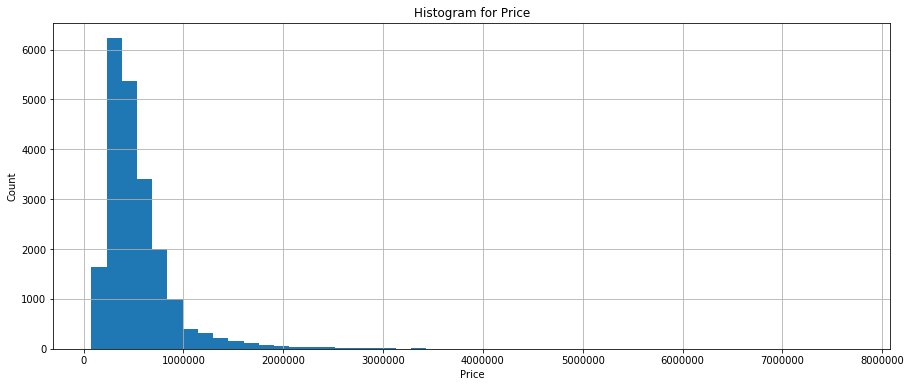

In [288]:
df.price.hist(bins = 50, figsize = [15,6])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram for Price')
plt.show()

Histogram shows price data has positive skew. Outliers are present. Mean is greater than median due to high number of outliers. The skew will affect our dataset so it must be normalized during the data cleaning step.

In [303]:
len(df.loc[df.price >= 2500000])

100

In [294]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 4.035775
Kurtosis: 34.751188


In [ ]:
#Skewness is high meaning data for price is highly skewed
#Kurtosis is also high meaning data is leptokurtic, or 'skinny'. 
#The majority of data is in the peak with a small number of outliers

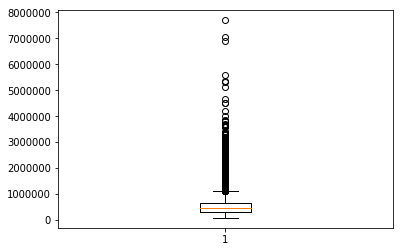

In [298]:
plt.boxplot(df.price)
plt.show()

In [ ]:
#Price data will need to be transformed due to high degree of skew. Will perform in later section.

### Check for null values

In [439]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [ ]:
#Waterfront, view and yr_renovated have null values.

In [440]:
#2339 null waterfront values
df.waterfront.unique()

array(['nan', '0.0', '1.0'], dtype=object)

In [441]:
df.waterfront.isna().sum()

0

In [442]:
2339/len(df)

0.11062763089438585

In [443]:
#11% of waterfront values are NaN, remove the rows
df = df[df.waterfront != 'nan']
df.shape

(18804, 21)

In [444]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               55
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3330
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [319]:
#55 null values in view
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [320]:
55/len(df)

0.0029249095937034673

In [445]:
#0.3% of data is NaN, remove rows
df = df[df.view == df.view]
df.shape

(18749, 21)

In [446]:
#yr_renovated has 3330 Nan values
df.yr_renovated.unique()

array([1991.,   nan,    0., 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 1980., 1971., 1945., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 2008., 2012., 1968.,
       1963., 1951., 1962., 2001., 1953., 1993., 1955., 1996., 1982.,
       1956., 1940., 1976., 1975., 1964., 1973., 1957., 1959., 1960.,
       1965., 1967., 1934., 1972., 1944., 1958., 1974.])

In [447]:
df.yr_renovated.value_counts()

0.0       14797
2014.0       61
2013.0       29
2005.0       27
2000.0       25
2003.0       24
2007.0       24
1990.0       22
2009.0       19
2006.0       18
2004.0       17
1989.0       15
2008.0       15
2002.0       15
1998.0       14
1999.0       13
1987.0       13
2010.0       13
2015.0       13
1984.0       13
1992.0       12
1994.0       12
1997.0       12
1983.0       11
1985.0       11
1986.0       11
1991.0       11
2001.0       11
1988.0       10
1993.0       10
          ...  
1975.0        5
1964.0        5
1973.0        4
1969.0        4
1968.0        4
1965.0        3
1956.0        3
1963.0        3
1981.0        3
1960.0        3
1958.0        3
1978.0        3
1972.0        3
1940.0        2
1957.0        2
1955.0        2
1951.0        1
1962.0        1
1959.0        1
1971.0        1
1944.0        1
1950.0        1
1953.0        1
1967.0        1
1934.0        1
1976.0        1
1948.0        1
1974.0        1
1945.0        1
1954.0        1
Name: yr_renovated, Leng

In [324]:
#3330 Nan values and 14797 0.0 values in year renovated column
(3330 + 14797)/len(df)

0.9668248973278575

In [448]:
#96.7% of the data in the year renovated column is not helping our data. I will drop the column from the dataframe.
df = df.drop(['yr_renovated'], axis = 1)

In [449]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [450]:
df.shape

(18749, 20)

In [451]:
#Total number of rows was decreased from 21597 to 18749 which is 86.8% of original dataset.
18749/21597

0.8681298328471547

In [34]:
#Null values have been removed!

### Exploratory Data Analysis

In [452]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930


In [454]:
#To clean up data, I am going to drop columns that are unnecessary for our question: id, lat, long and date at this time
df.drop(['id','lat','long','date'],axis = 1, inplace= True)

In [455]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930


### Questions about Data
  - Does number of bedrooms and bathrooms have affect on Price?
  - Does the grade that the county gives the listing correlate with the Price?
  - Does location (zipcode) increase Price of home?

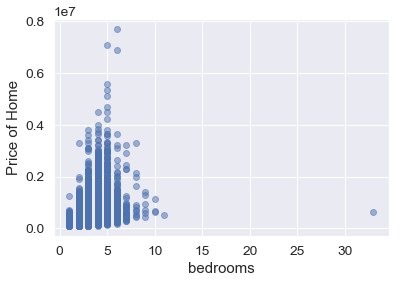

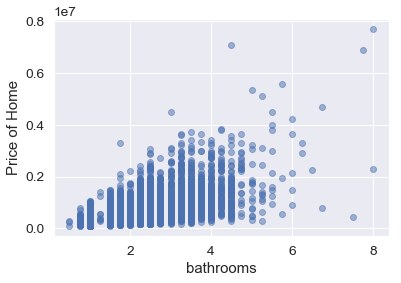

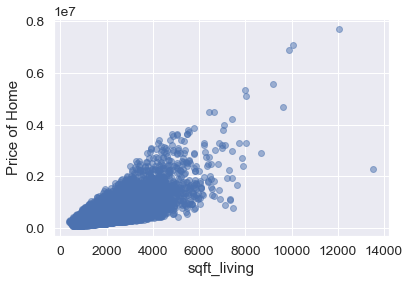

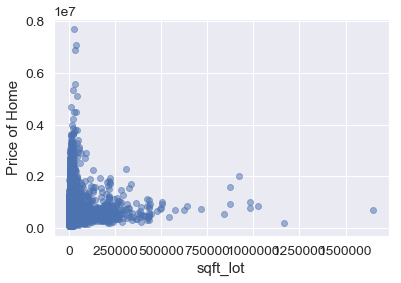

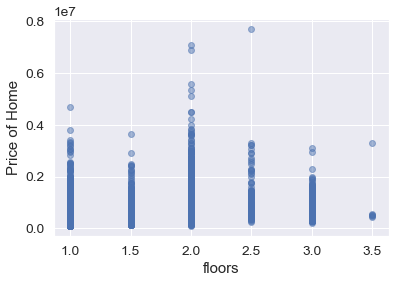

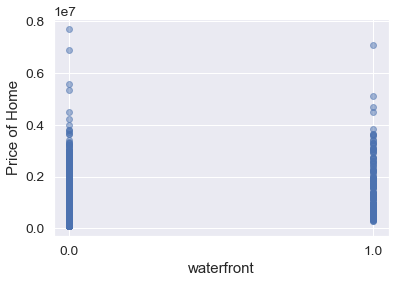

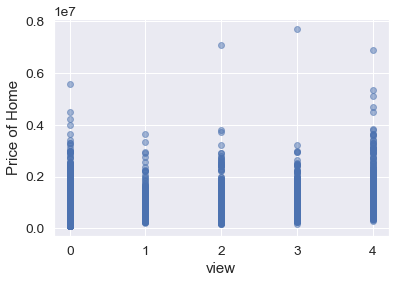

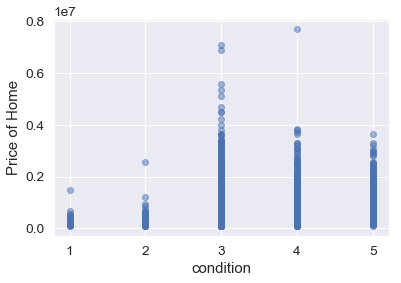

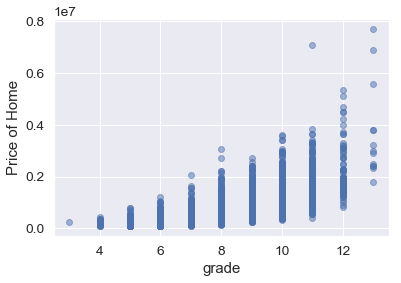

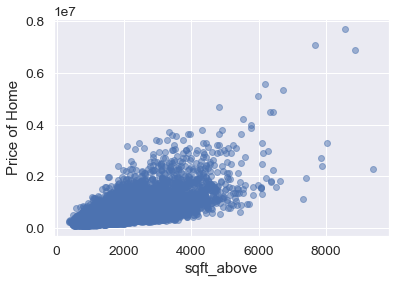

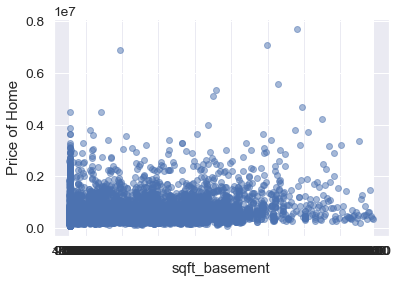

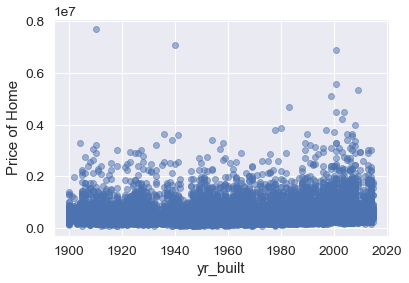

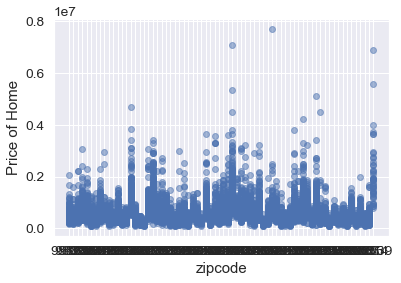

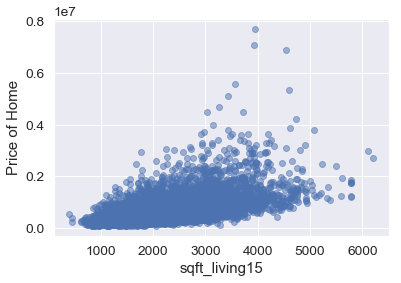

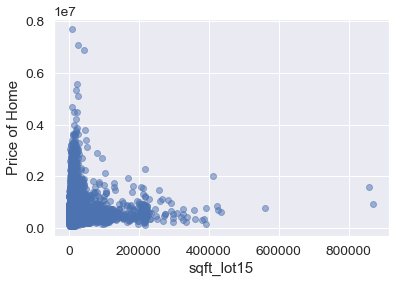

In [457]:
for column in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15']:
    plt.scatter(df[column],df['price'], alpha = 0.5)
    plt.xlabel(column)
    plt.ylabel("Price of Home")
    plt.show()

Initial observations of data from scatter plots comparing each column to price.
 - Bedrooms has positive skew and outlier present
 - Bathrooms look to have positive linear correlation to price
 - Sq_ft living and sq_ft living of 15 nearest properties also have positive linear correlation to price
 - Sq_ft lot and sq_ft lot of 15 nearest properties do not have an obvious relationship with price. Multiple near zero values exist - likely from condos or apartments.
 - Floors and view appear categorical, but may have slight quantitative relationship with price.
 - Waterfront is a categorical variable which will be converted to dummy variable
 - Condition of home has slight positive correlation with price.
 - Grade shows positive correlation
 - Sq_ft above shows positive linear correlation to price
 - Sq_ft basement and yr_built does not seem to have much correlation to price.
 - Zipcode does not have quantitative meaning so should be thought of as categorical 

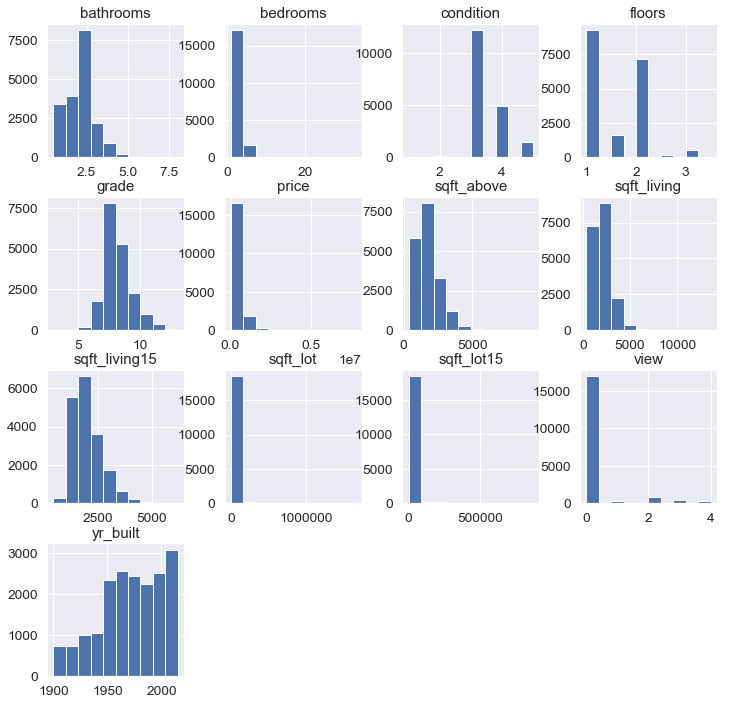

In [458]:
df.hist(figsize = [12,12])
plt.show()

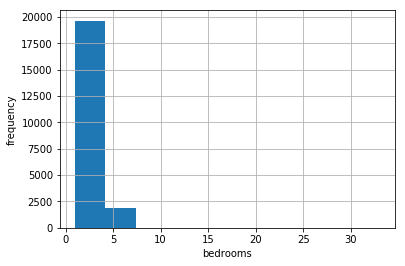

In [4]:
df.bedrooms.hist()
plt.xlabel('bedrooms')
plt.ylabel('frequency')
plt.show()

In [39]:
#Most of the features have positive, most normal histograms appear to be bathrooms and grade. 
#Outlier was noticed in scatterplot for bedrooms which is giving histogram positive skew

In [459]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
count,1.874900e+04,18749.000000,18749.000000,18749.000000,1.874900e+04,18749.000000,18749.000000,18749.000000,18749.000000,18749.000000,18749.000000,18749.000000,18749.000000
mean,5.416223e+05,3.374207,2.117446,2082.701264,1.508526e+04,1.494666,0.230626,3.410049,7.661209,1792.025975,1971.065764,1987.864419,12778.960745
std,3.716492e+05,0.927399,0.769283,922.410644,4.097762e+04,0.539928,0.763219,0.650349,1.176951,832.398189,29.324703,685.188038,27427.877265
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,399.000000,651.000000
25%,3.215000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.630000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,1840.000000,7628.000000
75%,6.435000e+05,4.000000,2.500000,2550.000000,1.072300e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,2360.000000,10100.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,2015.000000,6210.000000,871200.000000


In [41]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [460]:
#Outlier in bedrooms of 33 - Need to drop row
df = df[df['bedrooms'] < 32]

In [461]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10], dtype=int64)

In [462]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
count,1.874800e+04,18748.000000,18748.000000,18748.000000,1.874800e+04,18748.000000,18748.000000,18748.000000,18748.000000,18748.000000,18748.000000,18748.000000,18748.000000
mean,5.416170e+05,3.372626,2.117466,2082.725944,1.508574e+04,1.494693,0.230638,3.409964,7.661244,1792.066087,1971.067047,1987.899509,12779.391668
std,3.716584e+05,0.901828,0.769299,922.429055,4.097866e+04,0.539931,0.763238,0.650263,1.176973,832.402268,29.324959,685.189465,27428.545312
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,399.000000,651.000000
25%,3.215000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.630000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,1840.000000,7628.000000
75%,6.435000e+05,4.000000,2.500000,2550.000000,1.072300e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,2360.000000,10100.250000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,2015.000000,6210.000000,871200.000000


In [45]:
# Checking for other outliers
df['bathrooms'].value_counts()

2.50    4715
1.00    3318
1.75    2657
2.25    1750
2.00    1679
1.50    1258
2.75    1014
3.00     644
3.50     643
3.25     505
3.75     133
4.00     120
4.50      89
4.25      72
0.75      65
4.75      22
5.00      16
5.25      11
5.50       9
1.25       8
6.00       5
5.75       3
0.50       3
8.00       2
6.25       2
6.75       2
7.75       1
6.50       1
7.50       1
Name: bathrooms, dtype: int64

In [46]:
df['view'].unique()

array([0., 3., 4., 2., 1.])

In [47]:
df['view'].value_counts()

0.0    16940
2.0      809
3.0      426
1.0      288
4.0      285
Name: view, dtype: int64

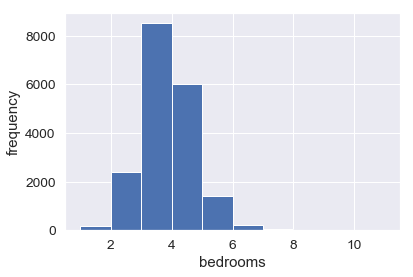

In [463]:
#Checking histograms again after removal of outlier in bedrooms
df.bedrooms.hist()
plt.xlabel('bedrooms')
plt.ylabel('frequency')
plt.show()

In [464]:
#checking for multicollinearity
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.317474,0.526309,0.704962,0.087598,0.258978,0.397249,0.036829,0.667690,0.609667,0.054433,0.583710,0.082495
bedrooms,0.317474,1.000000,0.530968,0.594668,0.030876,0.189637,0.088328,0.020648,0.370858,0.495079,0.164442,0.403970,0.029128
bathrooms,0.526309,0.530968,1.000000,0.755334,0.085595,0.507880,0.188152,-0.128021,0.667155,0.687339,0.508606,0.569427,0.087285
sqft_living,0.704962,0.594668,0.755334,1.000000,0.173273,0.358067,0.287561,-0.059391,0.764120,0.877932,0.318867,0.755537,0.183620
sqft_lot,0.087598,0.030876,0.085595,0.173273,1.000000,-0.007359,0.071049,-0.015140,0.115286,0.184406,0.055958,0.144972,0.719966
floors,0.258978,0.189637,0.507880,0.358067,-0.007359,1.000000,0.029117,-0.262945,0.459171,0.525510,0.490887,0.280496,-0.011400
view,0.397249,0.088328,0.188152,0.287561,0.071049,0.029117,1.000000,0.046679,0.249622,0.170041,-0.054834,0.278395,0.071079
condition,0.036829,0.020648,-0.128021,-0.059391,-0.015140,-0.262945,0.046679,1.000000,-0.146107,-0.155828,-0.362013,-0.092752,-0.006935
grade,0.667690,0.370858,0.667155,0.764120,0.115286,0.459171,0.249622,-0.146107,1.000000,0.757846,0.446886,0.713503,0.122138
sqft_above,0.609667,0.495079,0.687339,0.877932,0.184406,0.525510,0.170041,-0.155828,0.757846,1.000000,0.422892,0.731994,0.193685


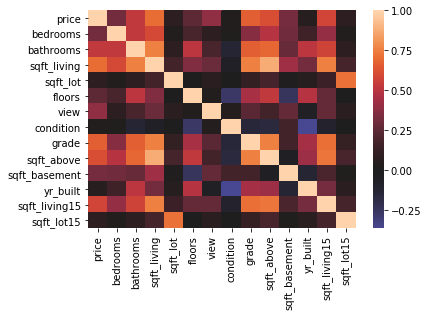

In [50]:
sns.heatmap(df.corr(), center=0);

Based on heatmap and corrlelation chart, none of the predictors appear to have multicollinearity (corr > 0.75) with price
Most correlation with price is sqft_living, grade, sqft_above, sqft_living15 and bathrooms. This was also seen on scatter plots.

### Feature Scaling and Normalization

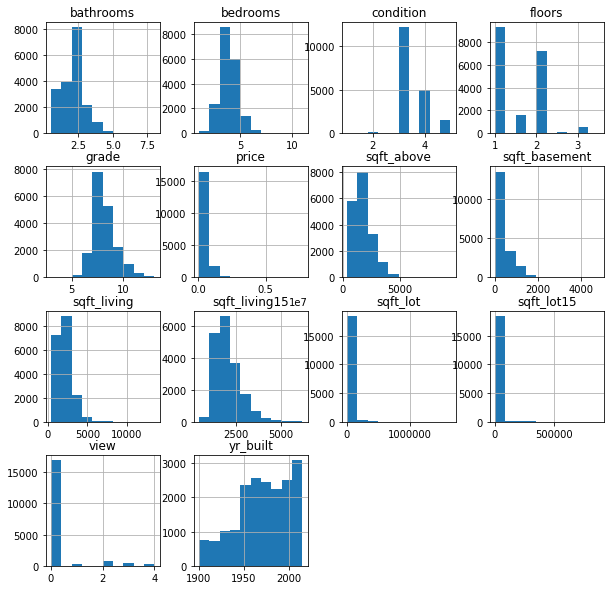

In [55]:
#checking histograms again to look at skewness
df.hist(figsize = [10,10])
plt.show()

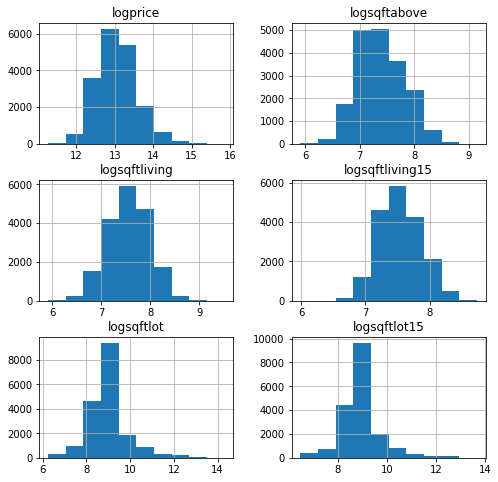

In [336]:
#Performing log transformations on predictors with most skew
data_log = pd.DataFrame([])
data_log["logprice"] = np.log(df['price'])
data_log["logsqftabove"] = np.log(df["sqft_above"])
data_log["logsqftliving"] = np.log(df["sqft_living"])
data_log["logsqftliving15"] = np.log(df["sqft_living15"])
data_log["logsqftlot"] = np.log(df["sqft_lot"])
data_log["logsqftlot15"] = np.log(df["sqft_lot15"])
data_log.hist(figsize  = [8,8]);

Viewing the histograms of the log transformed variables improved normality of features. Sqft_basement was not log transformed due to zeros.

In [337]:
df_total = pd.concat([df, data_log],axis = 1)

In [338]:
df_total.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'logprice', 'logsqftabove', 'logsqftliving', 'logsqftliving15',
       'logsqftlot', 'logsqftlot15'],
      dtype='object')

In [339]:
df_total.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,zipcode,sqft_living15,sqft_lot15,logprice,logsqftabove,logsqftliving,logsqftliving15,logsqftlot,logsqftlot15
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,1951,98125,1690,7639,13.195614,7.682482,7.851661,7.432484,8.887653,8.941022
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,1933,98028,2720,8062,12.100712,6.646391,6.646391,7.908387,9.210340,8.994917
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,1965,98136,1360,5000,13.311329,6.956545,7.580700,7.215240,8.517193,8.517193
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,1987,98074,1800,7503,13.142166,7.426549,7.426549,7.495542,8.997147,8.923058
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,...,2001,98053,4760,101930,14.022525,8.266164,8.597851,8.468003,11.532042,11.532042


In [340]:
#drop non-transformed variables and categorical variables
df_total = df_total.drop(['sqft_living15', 'sqft_lot15', 'sqft_living', 'sqft_lot','sqft_above', 'price'],axis = 1)

In [341]:
df_total.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_basement', 'yr_built', 'zipcode', 'logprice',
       'logsqftabove', 'logsqftliving', 'logsqftliving15', 'logsqftlot',
       'logsqftlot15'],
      dtype='object')

In [342]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18748 entries, 1 to 21596
Data columns (total 16 columns):
bedrooms           18748 non-null int64
bathrooms          18748 non-null float64
floors             18748 non-null float64
waterfront         18748 non-null object
view               18748 non-null float64
condition          18748 non-null int64
grade              18748 non-null int64
sqft_basement      18748 non-null float64
yr_built           18748 non-null int64
zipcode            18748 non-null object
logprice           18748 non-null float64
logsqftabove       18748 non-null float64
logsqftliving      18748 non-null float64
logsqftliving15    18748 non-null float64
logsqftlot         18748 non-null float64
logsqftlot15       18748 non-null float64
dtypes: float64(10), int64(4), object(2)
memory usage: 2.4+ MB


In [343]:
df_total.corr()['logprice'].sort_values(ascending=False)

logprice           1.000000
grade              0.704557
logsqftliving      0.674714
logsqftliving15    0.605177
logsqftabove       0.588293
bathrooms          0.551485
bedrooms           0.352325
view               0.346698
floors             0.314043
sqft_basement      0.313946
logsqftlot         0.138116
logsqftlot15       0.123951
yr_built           0.082768
condition          0.037639
Name: logprice, dtype: float64

After log transformation, the top correlated features are the same as predicted based on the scatter plots.

### Deciding on categorical variables
  - Waterfront is categorical due to 1 meaning waterfront and 0 being non waterfront. Numbers don't mean anything based on values.
  - Zipcode is also categorical. Although it is numbers, it doesn't mean anything quantitatively.
  - A number of variables have scatter plots demonstrating categorical in nature, but the values still mean something quantitatively. For example: Bedrooms, bathrooms, grade, view, floors, year built and condition
  - At this time I will convert waterfront and zipcode to categorical

In [345]:
waterfront_dummies = pd.get_dummies(df["waterfront"], prefix="waterfront",drop_first=True)
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix = 'zipcode',drop_first=True)
df_final = pd.concat([df_total, waterfront_dummies, zipcode_dummies], axis = 1)
df_final.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
1,3,2.25,2.0,0.0,0.0,3,7,400.0,1951,98125,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,1.0,0.0,0.0,3,6,0.0,1933,98028,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1.0,0.0,0.0,5,7,910.0,1965,98136,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1.0,0.0,0.0,3,8,0.0,1987,98074,...,0,0,0,0,0,0,0,0,0,0
5,4,4.50,1.0,0.0,0.0,3,11,1530.0,2001,98053,...,0,0,0,0,0,0,0,0,0,0


In [346]:
df_final = df_final.drop(['waterfront', 'zipcode'],axis = 1)

In [347]:
df_final.columns

Index(['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'logprice', 'logsqftabove',
       'logsqftliving', 'logsqftliving15', 'logsqftlot', 'logsqftlot15',
       'waterfront_1.0', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102',

### Min Max Scaling
 - Features must be scaled in order to bring them to the same units to compare them to eachother.

In [349]:
price = df_final['logprice']
bedroom = df_final['bedrooms']
bathroom = df_final['bathrooms']
floor = df_final['floors']
view = df_final['view']
condition = df_final['condition']
grade = df_final['grade']
basement = df_final['sqft_basement']
year = df_final['yr_built']
above = df_final['logsqftabove']
living = df_final['logsqftliving']
living15 = df_final['logsqftliving15']
lot = df_final['logsqftlot']
lot15 = df_final['logsqftlot15']

# minmax scaling
df_final['logprice'] = (price-min(price))/(max(price)-min(price))
df_final['bedrooms'] = (bedroom-min(bedroom))/(max(bedroom)-min(bedroom))
df_final['bathrooms'] = (bathroom-min(bathroom))/(max(bathroom)-min(bathroom))
df_final['floors'] = (floor-min(floor))/(max(floor)-min(floor))
df_final['view'] = (view-min(view))/(max(view)-min(view))
df_final['condition'] = (condition-min(condition))/(max(condition)-min(condition))
df_final['grade'] = (grade-min(grade))/(max(grade)-min(grade))
df_final['sqft_basement'] = (basement-min(basement))/(max(basement)-min(basement))
df_final['yr_built'] = (year-min(year))/(max(year)-min(year))
df_final['logsqftabove'] = (above-min(above))/(max(above)-min(above))
df_final['logsqftliving'] = (living-min(living))/(max(living)-min(living))
df_final['logsqftliving15'] = (living15-min(living15))/(max(living15)-min(living15))
df_final['logsqftlot']= (lot-min(lot))/(max(lot)-min(lot))
df_final['logsqftlot15'] = (lot15-min(lot15))/(max(lot15)-min(lot15))

In [350]:
df_final.head()

,bedrooms,bathrooms,floors,view,condition,grade,sqft_basement,yr_built,logprice,logsqftabove,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
1,0.2,0.233333,0.4,0.0,0.5,0.4,0.082988,0.443478,0.420522,0.546652,...,0,0,0,0,0,0,0,0,0,0
2,0.1,0.066667,0.0,0.0,0.5,0.3,0.000000,0.286957,0.182099,0.226478,...,0,0,0,0,0,0,0,0,0,0
3,0.3,0.333333,0.0,0.0,1.0,0.4,0.188797,0.565217,0.445720,0.322322,...,0,0,0,0,0,0,0,0,0,0
4,0.2,0.200000,0.0,0.0,0.5,0.5,0.000000,0.756522,0.408883,0.467563,...,0,0,0,0,0,0,0,0,0,0
5,0.3,0.533333,0.0,0.0,0.5,0.8,0.317427,0.878261,0.600588,0.727022,...,0,0,0,0,0,0,0,0,0,0


### Ordinary Least Squares Model

In [352]:
outcome = 'logprice'
predictors = df_final.drop('logprice', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df_final['logprice'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1704.
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:46:51   Log-Likelihood:                 34120.
No. Observations:               18748   AIC:                        -6.807e+04
Df Residuals:                   18664   BIC:                        -6.741e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0725      0.004    -20.285      0.000      -0.079      -0.065
bedrooms           -0.0357      0.004     -8.104      0.000      -0.044      -0.027
bathrooms           0.0710      0.005     13.874      0.000       0.061       0.081
floors             -0.0105      0.002     -4.799      0.000      -0.015      -0.006
view                0.0520      0.002     27.955      0.000       0.048       0.056
condition           0.0428      0.002     21.479      0.000       0.039       0.047
grade               0.2068      0.005     44.502      0.000       0.198       0.216
sqft_basement       0.0118      0.009      1.279      0.201      -0.006       0.030
yr_built           -0.0106      0.002     -5.551      0.000      -0.014      -0.007
logsqftabove        0.1210      0.012     10.263      0.000       0.098       0.144
logsqftliving       0.2031      0.014     14.323      0.000       0.175       0.231
logsqftliving15     0.0867      0.004     20.306      0.000       0.078       0.095
logsqftlot          0.1208      0.007     17.768      0.000       0.108       0.134
logsqftlot15       -0.0270      0.007     -4.045      0.000      -0.040      -0.014
waterfront_1.0      0.1065      0.004     28.724      0.000       0.099       0.114
zipcode_98002       0.0022      0.004      0.605      0.545      -0.005       0.009
zipcode_98003       0.0032      0.003      0.965      0.334      -0.003       0.010
zipcode_98004       0.2483      0.003     75.709      0.000       0.242       0.255
zipcode_98005       0.1584      0.004     40.838      0.000       0.151       0.166
zipcode_98006       0.1418      0.003     47.684      0.000       0.136       0.148
zipcode_98007       0.1432      0.004     33.751      0.000       0.135       0.152
zipcode_98008       0.1441      0.003     43.150      0.000       0.138       0.151
zipcode_98010       0.0541      0.005     11.222      0.000       0.045       0.064
zipcode_98011       0.0976      0.004     26.113      0.000       0.090       0.105
zipcode_98014       0.0668      0.004     15.055      0.000       0.058       0.076
zipcode_98019       0.0715      0.004     18.886      0.000       0.064       0.079
zipcode_98022       0.0118      0.004      3.315      0.001       0.005       0.019
zipcode_98023      -0.0048      0.003     -1.651      0.099      -0.011       0.001
zipcode_98024       0.0941      0.005     18.171      0.000       0.084       0.104
zipcode_98027       0.1123      0.003     36.777      0.000       0.106       0.118
zipcode_98028       0.0916      0.003     27.505      0.000       0.085       0.098
zipcode_98029       0.1330      0.003     40.875      0.000       0.127       0.139
zipcode_98030       0.0111      0.003      3.260      0.001       0.004       0.018
zipcode_98031       0.0173      0.003      5.135      0.000

In [ ]:
#R Squared is 0.883 which shows good predictive nature of model. 

### Feature ranking with recursive feature elimination

In [356]:
linreg = LinearRegression()
predictors = df_final.drop('logprice', axis=1)
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(predictors, df_final["logprice"])

In [357]:
selector.support_

array([False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [358]:
selector.ranking_

array([58, 49, 74, 39, 55,  1, 65, 71, 36,  1,  9, 20, 59,  1, 78, 77,  1,
       18, 24, 23, 21, 57, 40, 54, 52, 72, 75, 42, 34, 43, 28, 73, 69, 79,
       16, 30, 63,  1,  6, 70, 53, 26, 29, 64, 48, 62, 47, 44, 56, 38, 32,
       31, 41, 76,  7, 13,  5, 46, 10, 45,  3,  2, 12, 15, 11, 33,  4, 14,
       27, 22, 35, 17, 19, 51, 61, 37, 50, 66, 25, 60, 67, 68,  8])

In [359]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[0.42007694 0.31635299 0.15264653 0.14009245 0.18012215]
0.04529450923638362


In [360]:
selected_5 = predictors.columns[selector.support_ ]

In [361]:
df_final[selected_5].columns

Index(['grade', 'logsqftliving', 'waterfront_1.0', 'zipcode_98004',
       'zipcode_98039'],
      dtype='object')

In [363]:
linreg.fit(df_final[selected_5],df_final['logprice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [364]:
X = predictors
y = df_final['logprice']

In [365]:
yhat = linreg.predict(df_final[selected_5])

In [366]:
yhat

array([0.38364725, 0.23572247, 0.35983563, ..., 0.41628199, 0.30243866,
       0.30243866])

In [367]:
SSR = np.sum((y - yhat)**2)
SSR

102.2485955158461

In [368]:
SST = np.sum((y - np.mean(y))**2)
SST

247.25924119805583

In [369]:
r_squared = 1 - (SSR/SST)
r_squared

0.5864720969763695

In [370]:
r_squared_adj = 1 - (1 - r_squared)*((len(y)-1)/(len(y)-X.shape[1]-1))
r_squared_adj

0.5846331119811401

In [ ]:
#manually computing r squared using only the 5 features selected using Recursive feature elimination lowers value to .585
#When using all features in OLS, R squared was 0.883 which is a better model
#Adding more features generally increases R squared. Can view how r squared changes using for loop.

In [263]:
X.shape

(18748, 83)

In [371]:
r_list = []
adj_r_list = []
list_n = list(range(5,76,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
    r_list.append(r_squared)
    adj_r_list.append(adjusted_r_squared)

0.5864720969763695
0.5846331119811401
0.6664612228070514
0.6649779545629979
0.7530894779503292
0.7519914510895211
0.8063119829277613
0.8054506399457105
0.8467706277192291
0.8460892069145085
0.8700090176983121
0.8694309394979778
0.8791816600987093
0.878644373224952
0.8830460234100093
0.8825259216066997


In [372]:
print(list_n)
print(adj_r_list)

[5, 15, 25, 35, 45, 55, 65, 75]
[0.5846331119811401, 0.6649779545629979, 0.7519914510895211, 0.8054506399457105, 0.8460892069145085, 0.8694309394979778, 0.878644373224952, 0.8825259216066997]


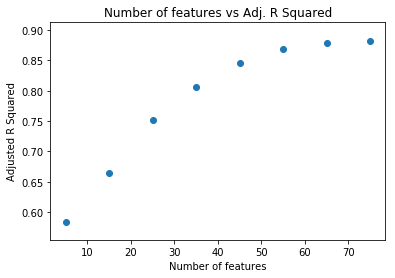

In [373]:
#As number of features used, r squared increases
plt.scatter(list_n, adj_r_list)
plt.title('Number of features vs Adj. R Squared')
plt.xlabel('Number of features')
plt.ylabel('Adjusted R Squared')
plt.show()

The graph above shows that using 75 features gives the highest r squared value.  As number of features increases, r squared increases. This can be interpreted that the more features used, the more predictive the model. Sometimes, however, adding more features can lead to overfitting of the model. To check for this, train test split and cross validation should be completed.

### Train test split

In [374]:
from sklearn.model_selection import train_test_split
X = df_final.drop('logprice', axis=1)
y = df_final['logprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [375]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

14998 3750 14998 3750


In [376]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [377]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [378]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [379]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [380]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.0015350730328237713
Test Mean Squared Error: 0.001557386132357538


Train and Test MSE using all features are very low, and similar in value which shows the model is predictive of price. MSE will change based on amount of features used which can be viewed using a for loop.

In [381]:
MSE_test = []
MSE_train = []
list_n = list(range(5,76,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
    MSE_test.append(mse_test)
    MSE_train.append(mse_train)

0.005483217543156833
0.005337682988471521
0.00442733181776984
0.00428808076870057
0.0032646523739359467
0.0032273902649203787
0.0025261707421624854
0.002547395490702306
0.0020271219916105374
0.0020032659922299954
0.0017114785309948989
0.0017018391964976035
0.0015917225358596575
0.0016105095795673962
0.0015410046206367828
0.0015618081630863684


In [382]:
print('MSE TEST: ', np.mean(MSE_test))
print('MSE TRAIN: ', np.mean(MSE_train))

MSE TEST:  0.0027847465555220175
MSE TRAIN:  0.0028215875195158726


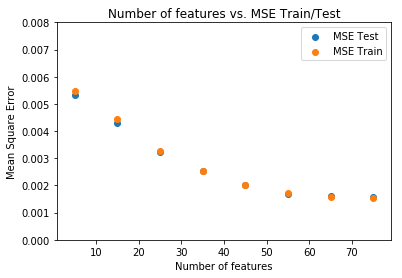

In [385]:
plt.scatter(list_n, MSE_test, label = "MSE Test")
plt.scatter(list_n, MSE_train, label = "MSE Train")
plt.legend()
plt.title('Number of features vs. MSE Train/Test')
plt.xlabel('Number of features')
plt.ylabel('Mean Square Error')
plt.ylim(ymax = .008, ymin = 0)
plt.show()

As more features are selected, mean square error decreases. MSE test and MSE train are almost identical, which means the model is working for the data.

### Cross Validation

In [386]:
from sklearn.model_selection import cross_val_score
cv_5_results = cross_val_score(linreg,X,y,cv=5, scoring = "neg_mean_squared_error")
cv_5_results

array([-0.00161899, -0.00161973, -0.00153939, -0.00156284, -0.00148775])

In [387]:
cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [388]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.0015657376079262555
-0.0015641894254556903
-0.0015571598227703577


Mean of cross validation is similar to test/train split results.  This should validate that the model created is predictive of future data.

### Checking columns/pvalues. Finalizing model

In [391]:
df_features = df_final.drop('logprice', axis=1)

In [401]:
features_int = sm.add_constant(df_features)
model = sm.OLS(df_final['logprice'], features_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1704.
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:10:30   Log-Likelihood:                 34120.
No. Observations:               18748   AIC:                        -6.807e+04
Df Residuals:                   18664   BIC:                        -6.741e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0725      0.004    -20.285      0.000      -0.079      -0.065
bedrooms           -0.0357      0.004     -8.104      0.000      -0.044      -0.027
bathrooms           0.0710      0.005     13.874      0.000       0.061       0.081
floors             -0.0105      0.002     -4.799      0.000      -0.015      -0.006
view                0.0520      0.002     27.955      0.000       0.048       0.056
condition           0.0428      0.002     21.479      0.000       0.039       0.047
grade               0.2068      0.005     44.502      0.000       0.198       0.216
sqft_basement       0.0118      0.009      1.279      0.201      -0.006       0.030
yr_built           -0.0106      0.002     -5.551      0.000      -0.014      -0.007
logsqftabove        0.1210      0.012     10.263      0.000       0.098       0.144
logsqftliving       0.2031      0.014     14.323      0.000       0.175       0.231
logsqftliving15     0.0867      0.004     20.306      0.000       0.078       0.095
logsqftlot          0.1208      0.007     17.768      0.000       0.108       0.134
logsqftlot15       -0.0270      0.007     -4.045      0.000      -0.040      -0.014
waterfront_1.0      0.1065      0.004     28.724      0.000       0.099       0.114
zipcode_98002       0.0022      0.004      0.605      0.545      -0.005       0.009
zipcode_98003       0.0032      0.003      0.965      0.334      -0.003       0.010
zipcode_98004       0.2483      0.003     75.709      0.000       0.242       0.255
zipcode_98005       0.1584      0.004     40.838      0.000       0.151       0.166
zipcode_98006       0.1418      0.003     47.684      0.000       0.136       0.148
zipcode_98007       0.1432      0.004     33.751      0.000       0.135       0.152
zipcode_98008       0.1441      0.003     43.150      0.000       0.138       0.151
zipcode_98010       0.0541      0.005     11.222      0.000       0.045       0.064
zipcode_98011       0.0976      0.004     26.113      0.000       0.090       0.105
zipcode_98014       0.0668      0.004     15.055      0.000       0.058       0.076
zipcode_98019       0.0715      0.004     18.886      0.000       0.064       0.079
zipcode_98022       0.0118      0.004      3.315      0.001       0.005       0.019
zipcode_98023      -0.0048      0.003     -1.651      0.099      -0.011       0.001
zipcode_98024       0.0941      0.005     18.171      0.000       0.084       0.104
zipcode_98027       0.1123      0.003     36.777      0.000       0.106       0.118
zipcode_98028       0.0916      0.003     27.505      0.000       0.085       0.098
zipcode_98029       0.1330      0.003     40.875      0.000       0.127       0.139
zipcode_98030       0.0111      0.003      3.260      0.001       0.004       0.018
zipcode_98031       0.0173      0.003      5.135      0.000

In [403]:
#Remove pvalues > 0.05
df_selectedfeatures = df_features.drop(['sqft_basement','zipcode_98002','zipcode_98003','zipcode_98023','zipcode_98032',
                                                'zipcode_98092'], axis = 1)

In [404]:
#Final Model
selectedfeatures = sm.add_constant(df_selectedfeatures)
model1 = sm.OLS(df_final['logprice'], selectedfeatures).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1836.
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:14:49   Log-Likelihood:                 34112.
No. Observations:               18748   AIC:                        -6.807e+04
Df Residuals:                   18670   BIC:                        -6.746e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0731      0.003    -25.028      0.000      -0.079      -0.067
bedrooms           -0.0357      0.004     -8.116      0.000      -0.044      -0.027
bathrooms           0.0721      0.005     14.207      0.000       0.062       0.082
floors             -0.0106      0.002     -4.821      0.000      -0.015      -0.006
view                0.0525      0.002     28.774      0.000       0.049       0.056
condition           0.0429      0.002     21.527      0.000       0.039       0.047
grade               0.2066      0.005     44.640      0.000       0.198       0.216
yr_built           -0.0105      0.002     -5.554      0.000      -0.014      -0.007
logsqftabove        0.1088      0.006     18.575      0.000       0.097       0.120
logsqftliving       0.2183      0.007     31.716      0.000       0.205       0.232
logsqftliving15     0.0863      0.004     20.292      0.000       0.078       0.095
logsqftlot          0.1214      0.007     17.864      0.000       0.108       0.135
logsqftlot15       -0.0266      0.007     -3.985      0.000      -0.040      -0.014
waterfront_1.0      0.1064      0.004     28.691      0.000       0.099       0.114
zipcode_98004       0.2482      0.003     95.447      0.000       0.243       0.253
zipcode_98005       0.1582      0.003     47.547      0.000       0.152       0.165
zipcode_98006       0.1417      0.002     64.314      0.000       0.137       0.146
zipcode_98007       0.1430      0.004     38.121      0.000       0.136       0.150
zipcode_98008       0.1439      0.003     53.596      0.000       0.139       0.149
zipcode_98010       0.0537      0.004     12.171      0.000       0.045       0.062
zipcode_98011       0.0974      0.003     30.666      0.000       0.091       0.104
zipcode_98014       0.0663      0.004     16.636      0.000       0.059       0.074
zipcode_98019       0.0711      0.003     21.952      0.000       0.065       0.077
zipcode_98022       0.0114      0.003      3.840      0.000       0.006       0.017
zipcode_98024       0.0936      0.005     19.519      0.000       0.084       0.103
zipcode_98027       0.1121      0.002     48.200      0.000       0.108       0.117
zipcode_98028       0.0913      0.003     34.076      0.000       0.086       0.097
zipcode_98029       0.1327      0.003     51.400      0.000       0.128       0.138
zipcode_98030       0.0108      0.003      3.884      0.000       0.005       0.016
zipcode_98031       0.0170      0.003      6.210      0.000       0.012       0.022
zipcode_98033       0.1733      0.002     75.794      0.000       0.169       0.178
zipcode_98034       0.1217      0.002     59.038      0.000       0.118       0.126
zipcode_98038       0.0381      0.002     18.832      0.000       0.034       0.042
zipcode_98039       0.2859      0.006     47.191      0.000

  Looking at the final model summary, it is important to point out the r squared of 0.883. This r squared shows good predictive nature of model. All features have p value less than 0.05 which shows correlation between the feature and the dependent variable, and we are able to throw out null hypothesis which states the feature does not have correlation.
  
  The coefficients for each feature indicate the importance of each feature to the overall model. The highest coeffients are zipcode_98004 at 0.2482 and zipcode_98039 at 0.2859. These coefficients can be intertpreted by saying that homes in these zipcodes will increase the price by 24.82% and 28.59%, respectively. This makes sense because location of a home is very important when talking about price.  The other features of high importance include sqft_living at 0.2183, bathrooms at .0721 and grade at 0.2066. The coefficient for sqft_living is showing a 1% increase in sqft_living will increase price by 0.2183%. An increase in 1 bathroom equals a 7.21% increase in price. A 1 point increase in grade increases the price by 20.66%. These three variables were shown at the beginning of analysis of having high positive correlation with the price.

In [408]:
df_final.corr()['logprice'].sort_values(ascending=False)

logprice           1.000000
grade              0.704557
logsqftliving      0.674714
logsqftliving15    0.605177
logsqftabove       0.588293
bathrooms          0.551485
bedrooms           0.352325
view               0.346698
floors             0.314043
sqft_basement      0.313946
zipcode_98004      0.226390
zipcode_98040      0.183128
waterfront_1.0     0.178653
zipcode_98112      0.161493
zipcode_98006      0.153170
logsqftlot         0.138116
zipcode_98039      0.128978
logsqftlot15       0.123951
zipcode_98075      0.121471
zipcode_98033      0.116235
zipcode_98105      0.101597
zipcode_98199      0.100727
zipcode_98119      0.093478
zipcode_98074      0.091569
zipcode_98005      0.089809
zipcode_98052      0.087889
yr_built           0.082768
zipcode_98053      0.080099
zipcode_98115      0.070525
zipcode_98109      0.069306
                     ...   
zipcode_98014     -0.016260
zipcode_98019     -0.021245
zipcode_98045     -0.024350
zipcode_98010     -0.025832
zipcode_98166     -0

### Top Features to determine price of home
1. Grade
2. Sqft_living
3. Sqft_above
4. Sqft_living15
5. Bathrooms
6. *Zipcode - Some influence more than others!

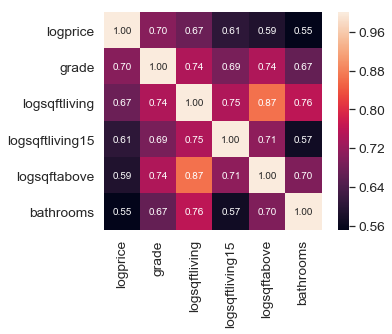

In [410]:
corrmat = df_final.corr()
k = 6 
cols = corrmat.nlargest(k, 'logprice')['logprice'].index
cm = np.corrcoef(df_final[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Heatmap is visualizing the correlation between price and top 5 features

## Revisiting original data questions
 #### Does number of bedrooms and bathrooms have affect on Price?
    - Based on the data, the number of bathrooms has more of an affect on price of a home than the bedrooms. The correlation between bathrooms and price is positive, meaning as the number of bathrooms increases, the price increases. 
 #### Does the grade that the county gives the listing correlate with the Price?
    - It appears that the grade given to the county is highly correlated to price. The higher the grade of the property, the higher the price of the home.
#### Does location (zipcode) increase Price of home?
    - The location does have an influence on the price of the home. Some zipcodes are shown to greatly influence the final price. This is can be seen in the model summary where the coefficients are higher on some zipcodes.